In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from absbox.local.china import SPV
from absbox import API
import pandas as pd
from pyspecter import query

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
cash_flow_agg_table = [["2023-08-31",1334084949.08,15515007.44,4741024.53]
                ,["2023-09-30",1318532306.24,15552642.84,4686139.82]
                ,["2023-10-31",1302970719.78,15561586.46,4630499.65]
                ,["2023-11-30",1287374888.39,15595831.39,4575752.54]
                ,["2023-12-31",1271782287.78,15592600.61,4520978.54]
                ,["2024-01-31",1256170354.97,15611932.81,4466149.06]
                ,["2024-02-29",1240582695.05,15587659.92,4411292.24]
                ,["2024-03-31",1225004666.81,15578028.24,4356473.84]
                ,["2024-04-30",1209435908.96,15568757.85,4301700.14]
                ,["2024-05-31",1193874950.56,15560958.40,4246993.95]
                ,["2024-06-30",1178335710.73,15539239.83,4192353.76]
                ,["2024-07-31",1162827934.28,15507776.45,4137755.40]
                ,["2024-08-31",1147350840.87,15477093.41,4083238.09]
                ,["2024-09-30",1131865988.14,15484852.73,4028854.78]
                ,["2024-10-31",1116355943.92,15510044.22,3974459.12]
                ,["2024-11-30",1100837322.94,15518620.98,3919932.99]
                ,["2024-12-31",1085376705.81,15460617.13,3865395.09]
                ,["2025-01-31",1069912827.67,15463878.14,3811080.69]
                ,["2025-02-28",1054473665.85,15439161.82,3756786.12]
                ,["2025-03-31",1039059620.22,15414045.63,3702604.76]
                ,["2025-04-30",1023712752.56,15346867.66,3648487.18]
                ,["2025-05-31",1008396563.47,15316189.09,3594651.99]
                ,["2025-06-30",993147590.13,15248973.34,3540912.08]
                ,["2025-07-31",977989718.16,15157871.97,3487394.61]
                ,["2025-08-31",962923589.60,15066128.56,3434315.63]
                ,["2025-09-30",947974725.05,14948864.55,3381447.35]
                ,["2025-10-31",933151363.63,14823361.42,3329008.25]
                ,["2025-11-30",918397377.41,14753986.22,3277080.67]
                ,["2025-12-31",903714569.58,14682807.83,3225343.79]
                ,["2026-01-31",889088220.20,14626349.38,3173861.78]
                ,["2026-02-28",874669481.61,14418738.59,3122648.88]
                ,["2026-03-31",860290636.43,14378845.18,3072056.86]
                ,["2026-04-30",846045931.17,14244705.26,3021776.44]
                ,["2026-05-31",832002033.60,14043897.57,2971800.02]
                ,["2026-06-30",818125186.84,13876846.76,2922627.68]
                ,["2026-07-31",804434156.11,13691030.73,2874040.84]
                ,["2026-08-31",790874105.70,13560050.41,2826075.27]
                ,["2026-09-30",777421810.39,13452295.31,2778581.78]
                ,["2026-10-31",764138979.47,13282830.92,2731391.46]
                ,["2026-11-30",750933325.50,13205653.97,2684812.00]
                ,["2026-12-31",737841275.24,13092050.26,2638503.61]
                ,["2027-01-31",724839625.99,13001649.25,2592581.32]
                ,["2027-02-28",711974779.81,12864846.18,2547065.94]
                ,["2027-03-31",699118260.74,12856519.07,2501913.99]
                ,["2027-04-30",686378129.26,12740131.48,2456839.85]
                ,["2027-05-31",673669947.54,12708181.72,2412183.37]
                ,["2027-06-30",661029004.08,12640943.46,2367587.18]
                ,["2027-07-31",648488715.94,12540288.14,2323273.10]
                ,["2027-08-31",636008227.23,12480488.71,2279266.47]
                ,["2027-09-30",623649329.18,12358898.05,2235510.87]
                ,["2027-10-31",611460294.67,12189034.51,2192147.73]
                ,["2027-11-30",599357883.58,12102411.09,2149415.51]
                ,["2027-12-31",587334428.88,12023454.70,2107005.42]
                ,["2028-01-31",575352337.19,11982091.69,2064808.34]
                ,["2028-02-29",563533534.84,11818802.35,2022758.78]
                ,["2028-03-31",551781154.00,11752380.84,1981310.50]
                ,["2028-04-30",540127804.09,11653349.91,1940128.95]
                ,["2028-05-31",528627073.65,11500730.44,1899182.32]
                ,["2028-06-30",517229020.52,11398053.13,1858827.62]
                ,["2028-07-31",505893855.56,11335164.96,1818786.49]
                ,["2028-08-31",494681714.06,11212141.50,1778974.50]
                ,["2028-09-30",483503009.85,11178704.21,1739612.71]
                ,["2028-10-31",472407007.74,11096002.11,1700344.38]
                ,["2028-11-30",461348770.77,11058236.97,1661367.98]
                ,["2028-12-31",450361703.64,10987067.13,1622565.24]
                ,["2029-01-31",439429463.93,10932239.71,1583885.82]
                ,["2029-02-28",428615740.60,10813723.33,1545475.15]
                ,["2029-03-31",417842299.07,10773441.53,1507485.76]
                ,["2029-04-30",407115175.10,10727123.97,1469652.56]
                ,["2029-05-31",396441843.51,10673331.59,1431983.22]
                ,["2029-06-30",385802344.11,10639499.40,1394494.02]
                ,["2029-07-31",375165998.78,10636345.33,1357164.95]
                ,["2029-08-31",364597016.96,10568981.82,1319800.63]
                ,["2029-09-30",354054953.97,10542062.99,1282689.81]
                ,["2029-10-31",343599859.39,10455094.58,1245680.78]
                ,["2029-11-30",333153323.02,10446536.37,1209040.93]
                ,["2029-12-31",322774623.05,10378699.97,1172340.22]
                ,["2030-01-31",312391409.71,10383213.34,1135895.24]
                ,["2030-02-28",302117631.88,10273777.83,1099495.57]
                ,["2030-03-31",291850000.64,10267631.24,1063449.95]
                ,["2030-04-30",281626700.37,10223300.27,1027448.17]
                ,["2030-05-31",271456229.53,10170470.84,991625.80]
                ,["2030-06-30",261409955.20,10046274.33,955926.72]
                ,["2030-07-31",251506028.22,9903926.98,920733.03]
                ,["2030-08-31",241724995.79,9781032.43,885999.52]
                ,["2030-09-30",232053569.93,9671425.86,851723.17]
                ,["2030-10-31",222577247.15,9476322.78,817841.79]
                ,["2030-11-30",213229484.06,9347763.09,784608.52]
                ,["2030-12-31",204020219.52,9209264.54,751886.41]
                ,["2031-01-31",194941679.93,9078539.59,719512.22]
                ,["2031-02-28",186150207.24,8791472.69,687794.08]
                ,["2031-03-31",177445959.23,8704248.01,656917.83]
                ,["2031-04-30",169005450.41,8440508.82,626555.93]
                ,["2031-05-31",160916053.62,8089396.79,596942.88]
                ,["2031-06-30",153075215.33,7840838.29,568598.50]
                ,["2031-07-31",145430362.28,7644853.05,541063.63]
                ,["2031-08-31",138031271.78,7399090.50,514253.18]
                ,["2031-09-30",130810572.02,7220699.16,488299.25]
                ,["2031-10-31",123829249.71,6981322.31,462926.79]
                ,["2031-11-30",117010095.47,6819154.24,438289.45]
                ,["2031-12-31",110446538.19,6563557.28,414319.07]
                ,["2032-01-31",104055816.15,6390722.04,391216.84]
                ,["2032-02-29",97857707.11,6198109.04,368841.89]
                ,["2032-03-31",91728308.17,6129398.94,346921.75]
                ,["2032-04-30",85822781.93,5905526.24,325409.57]
                ,["2032-05-31",80057601.90,5765180.03,304546.04]
                ,["2032-06-30",74445858.03,5611743.87,284218.22]
                ,["2032-07-31",69055100.07,5390757.96,264437.44]
                ,["2032-08-31",63997508.00,5057592.07,245446.40]
                ,["2032-09-30",59146579.68,4850928.32,227505.98]
                ,["2032-10-31",54487814.85,4658764.83,210344.32]
                ,["2032-11-30",50005373.00,4482441.85,193871.06]
                ,["2032-12-31",45616060.82,4359312.18,177986.84]
                ,["2033-01-31",41382784.65,4263276.17,162537.83]
                ,["2033-02-28",37294055.74,4088728.91,147471.10]
                ,["2033-03-31",33303627.78,3990427.96,132939.32]
                ,["2033-04-30",29496645.07,3806982.71,118861.31]
                ,["2033-05-31",26013811.82,3482833.25,105300.68]
                ,["2033-06-30",22897701.20,3116110.62,92987.47]
                ,["2033-07-31",20018338.20,2879363.00,81901.88]
                ,["2033-08-31",17282161.31,2736176.89,71637.51]
                ,["2033-09-30",14780050.10,2502111.21,61854.22]
                ,["2033-10-31",12450375.72,2329674.38,52898.74]
                ,["2033-11-30",10254350.86,2196024.86,44543.83]
                ,["2033-12-31",8305074.16,1949276.70,36694.16]
                ,["2034-01-31",6440431.89,1864642.27,29621.39]
                ,["2034-02-28",4929832.95,1510598.94,23039.32]
                ,["2034-03-31",3537811.61,1392021.34,17594.56]
                ,["2034-04-30",2418123.31,1119688.30,12618.38]
                ,["2034-05-31",1589781.89,828341.42,8536.35]
                ,["2034-06-30",984047.59,605734.30,5686.75]
                ,["2034-07-31",444778.57,539269.02,3420.00]
                ,["2034-08-31",136706.50,308072.07,1569.02]
                ,["2034-09-30",0.00,136706.50,483.29]]

In [138]:
cash_flow_agg_table_40bps_50 = [[i[0],i[1],i[2],i[3]*4.01/4.21] for i in cash_flow_agg_table]
cash_flow_agg_table_40bps_30 = [[i[0],i[1],i[2],i[3]*4.09/4.21] for i in cash_flow_agg_table]
cash_flow_agg_table_40bps_70 = [[i[0],i[1],i[2],i[3]*3.93/4.21] for i in cash_flow_agg_table]

In [139]:
cash_flow_agg_table_50bps_50 = [[i[0],i[1],i[2],i[3]*3.96/4.21] for i in cash_flow_agg_table]
cash_flow_agg_table_50bps_30 = [[i[0],i[1],i[2],i[3]*4.06/4.21] for i in cash_flow_agg_table]
cash_flow_agg_table_50bps_70 = [[i[0],i[1],i[2],i[3]*3.86/4.21] for i in cash_flow_agg_table]

In [140]:
cash_flow_agg_table_60bps_50 = [[i[0],i[1],i[2],i[3]*3.91/4.21] for i in cash_flow_agg_table] 
cash_flow_agg_table_60bps_30 = [[i[0],i[1],i[2],i[3]*4.03/4.21] for i in cash_flow_agg_table]
cash_flow_agg_table_60bps_70 = [[i[0],i[1],i[2],i[3]*3.79/4.21] for i in cash_flow_agg_table]

In [26]:
YYJH01_origin = SPV(
    "邮元家和2022年第一期个人住房抵押贷款"
    ,{"归集日":["2023-07-31","2023-08-31"],"兑付日":["2023-08-26","2023-09-26"]
     ,"法定到期日":"2060-12-01","收款频率":"月末","付款频率":["每月",26]}
    ,{'清单':[]
      ,'发行':{'资产池规模':3_345_673_979.83}
      ,'归集表': cash_flow_agg_table
     }
    ,(("收入分账户",{"余额":0}),("本金分账户",{"余额":0}))
    ,(("优先级",{"当前余额":939_312_000.00
             ,"当前利率":0.0235
             ,"初始余额":2_965_000_000.00
             ,"初始利率":0.0235
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":[0.0225,"LPR5Y",0.001,["每年",1,1]]}
             ,"债券类型":{"过手摊还":None}})
      ,("次级",{"当前余额":380_673_979.83
             ,"当前利率":0.0
             ,"初始余额":380_673_979.83
             ,"初始利率":0.0
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("增值税",{"类型":{"百分比费率":["资产池回款","利息",0.0326]}})
      ,("服务商费用",{"类型":{"年化费率":["资产池余额",0.0055]}})
      ,("报销",{"类型":{"周期费用":["月初",0]}}))
    ,{"未违约":[
          ["支付费用","收入分账户",["增值税"]]
         ,["计提费用","服务商费用"]
         ,["支付费用","收入分账户",["服务商费用"],{"应计费用百分比":0.5}]
         ,["支付费用","收入分账户",["报销"]]
         ,["计提支付利息","收入分账户",["优先级"]]
         ,["支付费用","收入分账户",["服务商费用"]]
         ,["账户转移",'收入分账户','本金分账户',{"冲销":"ABCD"}]
         ,["账户转移","收入分账户","本金分账户"]
         ,["支付本金","本金分账户",["优先级"]]
         ,["支付本金","本金分账户",["次级"]]
         ,["支付收益","本金分账户","次级"]
      ]
     ,"回款后":[["计提费用","增值税"]
               ,["簿记",["PDL"
                       ,("资产池累计违约余额",)
                       ,[("ABCD",("资产池累计违约余额",))]]]]
     ,"清仓回购":[["出售资产",["正常|违约",1.0,0.0],"收入分账户"]
                ,["支付本金","收入分账户",["优先级"]]
                ,["支付本金","收入分账户",["次级"]]
                ,["支付收益","收入分账户","次级"]]}
    ,(["利息回款","收入分账户"]
      ,["本金回款","本金分账户"]
      ,["早偿回款","本金分账户"]
      ,["回收回款","本金分账户"])
    ,None
    ,None
    ,None
    ,None
    ,"摊销"
    ,None
    ,{"ABCD":{"余额":0,"记录":[]}}
)

In [47]:
library_url = "https://absbox.org/library/latest"
localAPI = API("https://absbox.org/api/latest",'chinese',False)
#localAPI.loginLibrary("test","test",deal_library=library_url)

⠹ Connecting engine server -> https://absbox.org/api/latest

❌Error: Can't not connect to API server https://absbox.org/api/latest

In [31]:
myAssumption_cpr_base = [{"CPR":0.1}]

In [32]:
YYJH01_origin.json['contents']['bonds']['优先级']['bndInterestInfo']

{'tag': 'Floater',
 'contents': [0.0225,
  'LPR5Y',
  0.001,
  {'tag': 'MonthDayOfYear', 'contents': [1, 1]},
  'DC_ACT_365F',
  None,
  None]}

In [45]:
r = localAPI.run(YYJH01_origin
            ,assumptions = myAssumption_cpr_base
            ,pricing = {"贴现日":"2023-09-06"
                         ,"贴现曲线":[["2023-09-01",0.03]
                                     ,["2024-09-01",0.03]
                                     ,["2025-09-01",0.03]
                                     ,["2026-09-01",0.03]
                                     ,["2027-09-01",0.03]
                                     ,["2028-09-01",0.03]
                                     ,["2029-09-01",0.03]
                                     ,["2030-09-01",0.03]
                                     ,["2031-09-01",0.03]
                                     ,["2032-09-01",0.03]
                                     ,["2033-09-01",0.03]
                                     ,["2034-09-01",0.03]
                                     ,["2035-09-01",0.03]]})

⠙

In [ ]:
divideBB :: Balance -> Balance -> Rational
divideBB b1 b2 = toRational b1 / toRational b2


In [36]:
r['pricing']

,估值,票面估值,WAL,久期,凸性,应计利息
优先级,9.059384e+08,30.554414,1.54,0.89,4.44,0
次级,4.658735e+08,122.381228,4.77,2.83,38.01,0


In [46]:
r['pricing']

,估值,票面估值,WAL,久期,凸性,应计利息
优先级,9.059384e+08,30.554414,1.54,1.504457,4.44,0
次级,4.658735e+08,122.381228,4.77,5.645480,38.01,0


In [130]:
myAssumption_cpr_40bps_50 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.3/0.008742],"2023-10-27"]}]
myAssumption_cpr_40bps_30 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.42/0.008742],"2023-10-27"]}]
myAssumption_cpr_40bps_70 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.18/0.008742],"2023-10-27"]}]

In [131]:
myAssumption_cpr_50bps_50 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.3375/0.008742],"2023-10-27"]}]
myAssumption_cpr_50bps_30 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.4725/0.008742],"2023-10-27"]}]
myAssumption_cpr_50bps_70 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.2025/0.008742],"2023-10-27"]}]

In [132]:
myAssumption_cpr_60bps_50 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.36/0.008742],"2023-10-27"]}]
myAssumption_cpr_60bps_30 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.504/0.008742],"2023-10-27"]}]
myAssumption_cpr_60bps_70 = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.216/0.008742],"2023-10-27"]}]

In [133]:
myAssumption_cpr_50bps_50_continue = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.018/0.008742],"2025-08-27"]}]
myAssumption_cpr_50bps_30_continue = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.027/0.008742],"2025-08-27"]}]
myAssumption_cpr_50bps_70_continue = [{"CPR":0.1},{"CPR调整":[["2023-09-27",0.01/0.008742],"2025-08-27"]}]

In [134]:
scenario_name = ["Scenario "+i for i in "ABCDEFGHIJKLM"]

In [135]:
scenario_assumption = [i+[{"CDR":0.0008},{"回收":(0.7,18)}] for i in [myAssumption_cpr_base,myAssumption_cpr_40bps_50,myAssumption_cpr_40bps_30,myAssumption_cpr_40bps_70,myAssumption_cpr_50bps_50,myAssumption_cpr_50bps_30,myAssumption_cpr_50bps_70,myAssumption_cpr_60bps_50,myAssumption_cpr_60bps_30,myAssumption_cpr_60bps_70,myAssumption_cpr_50bps_50_continue,myAssumption_cpr_50bps_30_continue,myAssumption_cpr_50bps_70_continue]]

In [136]:
scenario_spv = [YYJH01_origin,YYJH01_40bp_50,YYJH01_40bp_30,YYJH01_40bp_70,YYJH01_50bp_50,YYJH01_50bp_30,YYJH01_50bp_70,YYJH01_60bp_50,YYJH01_60bp_30,YYJH01_60bp_70,YYJH01_50bp_50,YYJH01_50bp_30,YYJH01_50bp_70]

In [151]:
scenario_rt = {sce_name:localAPI.run(sce_spv,assumptions = sce_asumption,read=True) for sce_name,sce_spv,sce_asumption in zip(scenario_name,scenario_spv,scenario_assumption)}

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [221]:
senior_cash_flow_compare_df = pd.concat({k:query(v,["bonds","优先级","本息合计"][:-1])[["bonds","优先级","本息合计"][-1]] for k,v in scenario_rt.items()},axis=1)

In [222]:
senior_cash_flow_compare_df = senior_cash_flow_compare_df.fillna(0)

In [223]:
senior_cash_flow_compare_df_append = pd.DataFrame({"2027-05-26":{i:0 for i in senior_cash_flow_compare_df.columns.values}}).T

In [224]:
senior_cash_flow_compare_df = pd.concat([senior_cash_flow_compare_df,senior_cash_flow_compare_df_append]).astype("int64")

In [226]:
senior_cash_flow_compare_df.index = senior_cash_flow_compare_df.index.astype("datetime64[ns]")

In [233]:
senior_cash_flow_compare_df.index.name = "日期"

In [235]:
senior_cash_flow_compare_df

,Scenario A,Scenario B,Scenario C,Scenario D,Scenario E,Scenario F,Scenario G,Scenario H,Scenario I,Scenario J,Scenario K,Scenario L,Scenario M
日期,,,,,,,,,,,,,
2023-09-26,31312723,31096794,31183166,31010423,31042812,31150776,30934848,30988830,31118387,30859272,31042812,31150776,30934848
2023-10-26,30534114,30322539,30407169,30237910,30269646,30375433,30163858,30216752,30343697,30089807,30269646,30375433,30163858
2023-11-26,30445700,408896850,564954129,252819119,457615515,633351480,282014739,486835396,674425625,299510897,42223340,54026176,31718824
2023-12-26,29688290,20655257,17064069,24226412,19484781,15288168,23489274,18771408,14178003,23026210,40453094,51054118,30843343
2024-01-26,29584798,20585721,17005804,24146022,19419772,15399633,23412327,18709347,14431623,22951761,40116221,50285821,30727141
2024-02-26,29161410,20292050,16762894,23802001,19142955,15179770,23079135,18442870,14225679,22625494,39090691,48489647,30239872
2024-03-26,28067433,19528494,16132901,22905279,18422089,14609015,22208714,17747837,13690553,21771264,36754850,44828411,28990820
2024-04-26,28278984,19679534,16256401,23084258,18565487,14721282,22383804,17886870,13796169,21944437,37092162,45099138,29237807
2024-05-26,27541240,19165488,15831984,22480973,18080387,14336871,21798564,17419354,13435847,21370427,35504207,42583728,28397332


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

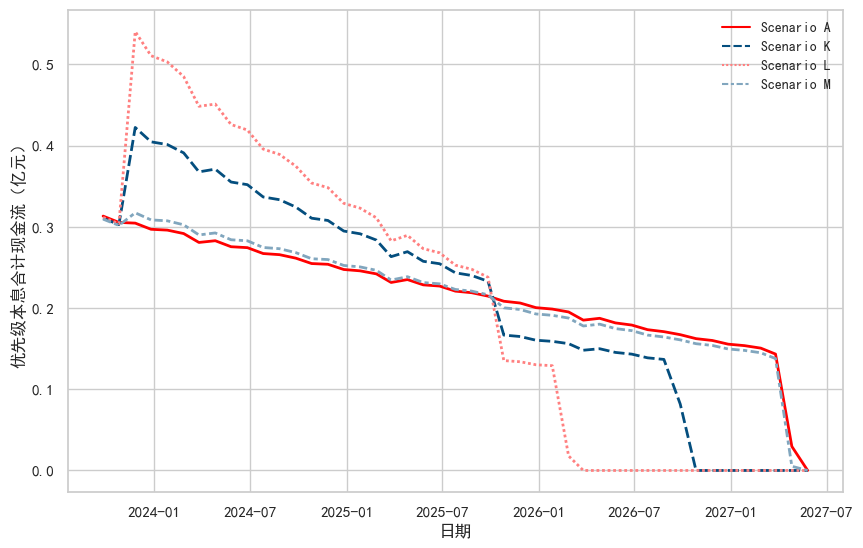

In [294]:
plt.figure()
#plt.figure(dpi=250)
sns.set(rc={'figure.figsize':(10,6.27),'font.sans-serif':['simhei','FangSong']},style="whitegrid")
sns.set_palette([(255/255,0/255,0/255),(4/255,78/255,126/255),(255/255,128/255,128/255),(129/255,166/255,190/255),(255/255,178/255,178/255),(180/255,202/255,216/255),(255/255,51/255,51/255),(54/255,113/255,152/255)])
sns.lineplot(senior_cash_flow_compare_df.loc[:,["Scenario A","Scenario K","Scenario L","Scenario M"]]/100000000,linewidth = 2)
plt.ylabel("优先级本息合计现金流（亿元）")
plt.legend(loc="upper right",frameon=False,fontsize=10)
plt.savefig("优先级本息合计现金流.jpg",bbox_inches = 'tight',dpi=300)

In [250]:
junior_cash_flow_compare_df = pd.concat({k:query(v,["bonds","次级","本息合计"][:-1])[["bonds","次级","本息合计"][-1]] for k,v in scenario_rt.items()},axis=1)

In [251]:
junior_cash_flow_compare_df = junior_cash_flow_compare_df.fillna(0)

In [254]:
junior_cash_flow_compare_df_append = pd.DataFrame({"2036-05-26":{i:0 for i in junior_cash_flow_compare_df.columns.values}}).T

In [256]:
junior_cash_flow_compare_df = pd.concat([junior_cash_flow_compare_df,junior_cash_flow_compare_df_append]).astype("int64")

In [257]:
junior_cash_flow_compare_df.index = junior_cash_flow_compare_df.index.astype("datetime64[ns]")

In [258]:
junior_cash_flow_compare_df.index.name = "日期"

In [266]:
junior_cash_flow_compare_df

,Scenario A,Scenario B,Scenario C,Scenario D,Scenario E,Scenario F,Scenario G,Scenario H,Scenario I,Scenario J,Scenario K,Scenario L,Scenario M
日期,,,,,,,,,,,,,
2023-09-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-10-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-11-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-12-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-03-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-04-26,0,0,0,0,0,0,0,0,0,0,0,0,0
2024-05-26,0,0,0,0,0,0,0,0,0,0,0,0,0


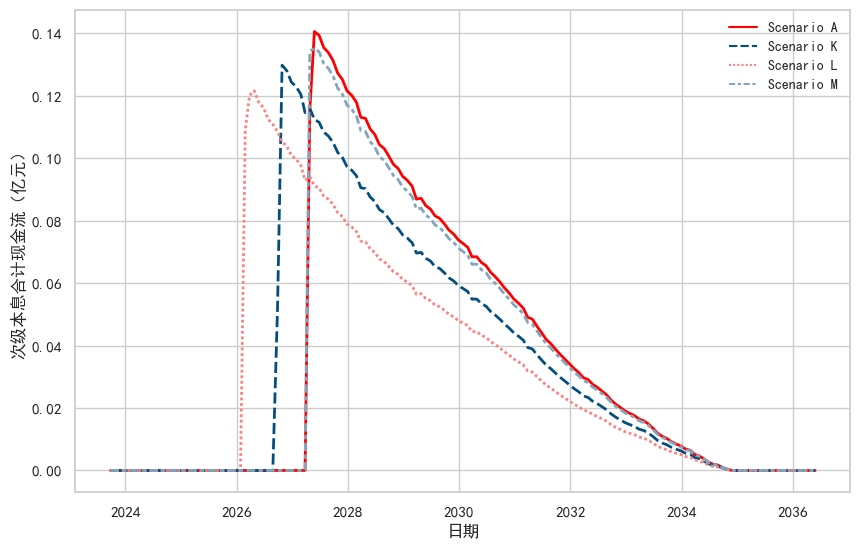

In [295]:
plt.figure()
#plt.figure(dpi=250)
sns.set(rc={'figure.figsize':(10,6.27),'font.sans-serif':['simhei','FangSong']},style="whitegrid")
sns.set_palette([(255/255,0/255,0/255),(4/255,78/255,126/255),(255/255,128/255,128/255),(129/255,166/255,190/255),(255/255,178/255,178/255),(180/255,202/255,216/255),(255/255,51/255,51/255),(54/255,113/255,152/255)])
sns.lineplot(junior_cash_flow_compare_df.loc[:,["Scenario A","Scenario K","Scenario L","Scenario M"]]/100000000,linewidth = 2)
plt.ylabel("次级本息合计现金流（亿元）")
plt.legend(loc="upper right",frameon=False,fontsize=10)
plt.savefig("次级本息合计现金流.jpg",bbox_inches = 'tight',dpi=300)

In [267]:
myPricing = {"贴现日":"2023-09-06"
             ,"贴现曲线":[["2023-09-01",0.022608]
                         ,["2024-09-01",0.024818]
                         ,["2025-09-01",0.027662]
                         ,["2026-09-01",0.028756]
                         ,["2027-09-01",0.029455]
                         ,["2028-09-01",0.030994]
                         ,["2029-09-01",0.031333]
                         ,["2030-09-01",0.031634]
                         ,["2031-09-01",0.032190]
                         ,["2032-09-01",0.032517]
                         ,["2033-09-01",0.032768]
                         ,["2034-09-01",0.032894]
                         ,["2035-09-01",0.032948]]}

In [268]:
scenario_pricing_rt = {sce_name:localAPI.run(sce_spv,assumptions = sce_asumption,pricing=myPricing,read=True) for sce_name,sce_spv,sce_asumption in zip(scenario_name,scenario_spv,scenario_assumption)}

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [292]:
pd.concat([scenario_pricing_rt[i]['pricing'].loc["优先级",:].rename(i) for i in scenario_pricing_rt.keys()],axis=1).astype("float64").to_excel("优先级估值.xlsx")

In [293]:
pd.concat([scenario_pricing_rt[i]['pricing'].loc["次级",:].rename(i) for i in scenario_pricing_rt.keys()],axis=1).astype("float64").to_excel("次级估值.xlsx")

In [83]:
from sympy import *

[]

In [85]:
x = symbols('x')
solve((1-0.001-x)*(1-0.002-x)*(1-0.003-x)*(1-0.004-x)*(1-0.005-x)*(1-0.006-x)*(1-0.007-x)*(1-0.008-x)*(1-0.009-x)*(1-0.01-x)*(1-0.011-x)*(1-0.012-x)-0.6625)

[0.0272231051431986,
 1.95977689485680,
 0.156679661973717 - 0.48313228109291*I,
 0.156679661973717 + 0.48313228109291*I,
 0.510361552588317 - 0.836809657648872*I,
 0.510361552588317 + 0.836809657648872*I,
 0.9935 - 0.966264562219255*I,
 0.9935 + 0.966264562219255*I,
 1.47663844741168 - 0.836809657648872*I,
 1.47663844741168 + 0.836809657648872*I,
 1.83032033802628 - 0.48313228109291*I,
 1.83032033802628 + 0.48313228109291*I]

In [88]:
x = symbols('x')
solve((1-0.0025-x)*(1-0.005-x)*(1-0.0075-x)*(1-0.01-x)*(1-0.0125-x)*(1-0.015-x)*(1-0.0175-x)*(1-0.02-x)*(1-0.0225-x)*(1-0.025-x)*(1-0.0275-x)*(1-0.03-x)*(1-0.0025-x)*(1-0.005-x)*(1-0.0075-x)*(1-0.01-x)*(1-0.0125-x)*(1-0.015-x)*(1-0.0175-x)*(1-0.02-x)*(1-0.0225-x)*(1-0.025-x)*(1-0.0275-x)-0.6625)

[0.00205485692077539,
 0.0384809453653791 - 0.265000477315367*I,
 0.0384809453653791 + 0.265000477315367*I,
 0.145057654165874 - 0.510347082120496*I,
 0.145057654165874 + 0.510347082120496*I,
 0.313880675891414 - 0.717843579490134*I,
 0.313880675891414 + 0.717843579490134*I,
 0.532429178736845 - 0.872100903459316*I,
 0.532429178736845 + 0.872100903459316*I,
 0.784494419565932 - 0.961678493670174*I,
 0.784494419565932 + 0.961678493670174*I,
 1.05138187239332 - 0.979932789547426*I,
 1.05138187239332 + 0.979932789547426*I,
 1.31329771588039 - 0.925509952990393*I,
 1.31329771588039 + 0.925509952990393*I,
 1.55081685042303 - 0.802446276504058*I,
 1.55081685042303 + 0.802446276504058*I,
 1.74632356878297 - 0.61986882990568*I,
 1.74632356878297 + 0.61986882990568*I,
 1.88531803238491 - 0.391318547276815*I,
 1.88531803238491 + 0.391318547276815*I,
 1.95749165794955 - 0.133745957751925*I,
 1.95749165794955 + 0.133745957751925*I]